# IMPORT LIBRARIES

In [ ]:
!pip install category_encoders


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders.woe import WOEEncoder
from sklearn.compose import ColumnTransformer

**IMPORT DATASET**

In [ ]:

train_transactions = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')
print(train_transactions.columns)
print('==============================')
print(train_identity.columns)

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)
Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')


**MERGE DATASET**

In [ ]:
# merge two datasets
train = pd.merge(train_transactions, train_identity, on='TransactionID', how='left')

In [ ]:
train_transactions

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10847,2997847,0,328123,120.000,W,14574,199.0,150.0,mastercard,102.0,credit,123.0,87.0,5.0,NaN,roadrunner.com,NaN,2.0,2.0,0.0,0.0,3.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,18.0,2.0,370.0,370.0,31.0,475.0,31.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10848,2997848,0,328131,210.950,W,17188,321.0,150.0,visa,226.0,debit,299.0,87.0,9.0,NaN,anonymous.com,NaN,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,127.0,127.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10849,2997849,0,328137,500.000,R,3998,399.0,150.0,american express,223.0,credit,264.0,87.0,NaN,NaN,yahoo.com,yahoo.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10850,2997850,0,328170,10.151,C,13351,555.0,150.0,visa,226.0,debit,NaN,NaN,NaN,NaN,yahoo.com,yahoo.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,87.791664,0.791666,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,N

**MAKE A TIME DETLTA**

In [ ]:

def make_hour_feature(f):
    #Creates an hour of the day feature, encoded as 0-23.
    hours = f / (3600)
    encoded_hours = np.floor(hours) % 24
    return encoded_hours

train['hour'] = make_hour_feature(train['TransactionDT'])

**ORGANIZING CATEGORICAL AND NUMERICAL VARIABLES**

In [ ]:
cat_features = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
               'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1',
               'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo',
               'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20',
               'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
               'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']
exclude = ['TransactionID', 'TransactionDT', 'isFraud']
num_features = [f for f in train.columns if (f not in cat_features) & (f not in exclude)]

# drop more than 90% NAs
col_na = train.isna().sum()
to_drop = col_na[(col_na / train.shape[0]) > 0.9].index

use_cols = [f for f in train.columns if f not in to_drop]
cat_features = [f for f in cat_features if f not in to_drop]
num_features = [f for f in num_features if f not in to_drop]

train[cat_features] = train[cat_features].astype(str)
train[num_features] = train[num_features].astype(np.float)
train = train[use_cols]



**HANDLING MISSING VALUE**

In [ ]:
# fill Na


# fill numeric NAs with median
median_values = train[num_features].median()
train[num_features] = train[num_features].fillna(median_values)

# fill categorical NAs with "missing"
train[cat_features] = train[cat_features].replace("nan", "missing")

train.isna().sum().sum()





0

**SPLIT DATA INTO DEPENDENT AND INDEPENDENT VARIABLE**

In [ ]:
# SPLIT

data = train.drop(columns=['TransactionID', 'TransactionDT'])

data.columns

Index(['isFraud', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3',
       'card4', 'card5', 'card6', 'addr1',
       ...
       'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo', 'hour'],
      dtype='object', length=415)

**HANDLING CATEGORICAL FEATURES**

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['ProductCD']= label_encoder.fit_transform(data['ProductCD'])
data['card1']= label_encoder.fit_transform(data['card1'])
data['card2']= label_encoder.fit_transform(data['card2'])
data['card3']= label_encoder.fit_transform(data['card3'])
data['card4']= label_encoder.fit_transform(data['card4'])
data['card5']= label_encoder.fit_transform(data['card5'])
data['card6']= label_encoder.fit_transform(data['card6'])
data['addr1']= label_encoder.fit_transform(data['addr1'])
data['addr2']= label_encoder.fit_transform(data['addr2'])
data['P_emaildomain']= label_encoder.fit_transform(data['P_emaildomain'])
data['R_emaildomain']= label_encoder.fit_transform(data['R_emaildomain'])
data['M1']= label_encoder.fit_transform(data['M1'])
data['M2']= label_encoder.fit_transform(data['M2'])
data['M3']= label_encoder.fit_transform(data['M3'])
data['M4']= label_encoder.fit_transform(data['M4'])
data['M5']= label_encoder.fit_transform(data['M5'])
data['M6']= label_encoder.fit_transform(data['M6'])
data['M7']= label_encoder.fit_transform(data['M7'])
data['M8']= label_encoder.fit_transform(data['M8'])
data['M9']= label_encoder.fit_transform(data['M9'])
data['id_12']= label_encoder.fit_transform(data['id_12'])
data['id_13']= label_encoder.fit_transform(data['id_13'])
data['id_14']= label_encoder.fit_transform(data['id_14'])
data['id_15']= label_encoder.fit_transform(data['id_15'])
data['id_16']= label_encoder.fit_transform(data['id_16'])
data['id_17']= label_encoder.fit_transform(data['id_17'])
# data['id_18']= label_encoder.fit_transform(data['id_18'])
data['id_19']= label_encoder.fit_transform(data['id_19'])
data['id_20']= label_encoder.fit_transform(data['id_20'])
#data['id_21']= label_encoder.fit_transform(data['id_21'])
#data['id_22']= label_encoder.fit_transform(data['id_22'])
#data['id_23']= label_encoder.fit_transform(data['id_23'])
# data['id_24']= label_encoder.fit_transform(data['id_24'])
# data['id_25']= label_encoder.fit_transform(data['id_25'])
# data['id_26']= label_encoder.fit_transform(data['id_26'])
#data['id_27']= label_encoder.fit_transform(data['id_27'])
data['id_28']= label_encoder.fit_transform(data['id_28'])
data['id_29']= label_encoder.fit_transform(data['id_29'])
data['id_30']= label_encoder.fit_transform(data['id_30'])
data['id_31']= label_encoder.fit_transform(data['id_31'])
data['id_32']= label_encoder.fit_transform(data['id_32'])
data['id_33']= label_encoder.fit_transform(data['id_33'])
data['id_34']= label_encoder.fit_transform(data['id_34'])
data['id_35']= label_encoder.fit_transform(data['id_35'])
data['id_36']= label_encoder.fit_transform(data['id_36'])
data['id_37']= label_encoder.fit_transform(data['id_37'])
data['id_38']= label_encoder.fit_transform(data['id_38'])
data['DeviceType']= label_encoder.fit_transform(data['DeviceType'])
data['DeviceInfo']= label_encoder.fit_transform(data['DeviceInfo'])



# **EXPLORATORY DATA ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


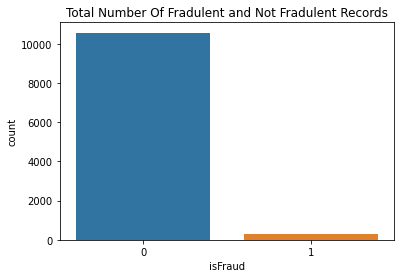

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot('isFraud',data=data)
plt.title('Total Number Of Fradulent and Not Fradulent Records')
plt.show()

In [ ]:

data['isFraud'].value_counts(normalize=True)

0    0.973369
1    0.026631
Name: isFraud, dtype: float64

In [ ]:
## Get the Fraud and the normal dataset

fraud = data[data['isFraud']==1]

normal = data[data['isFraud']==0]

print(fraud.shape,normal.shape)

(289, 415) (10563, 415)


In [ ]:

target = 'isFraud'
num_features = data.select_dtypes(include=np.number).columns
cat_features = data.select_dtypes(exclude=np.number).columns

num_features = [f for f in num_features if f != target]

In [ ]:
X=data[num_features+list(cat_features)]
print(X)
Y=data['isFraud']
print(' ========================== Target================')
print(Y)

       TransactionAmt  ProductCD  card1  ...  DeviceType  DeviceInfo  hour
0              68.500          4    545  ...           1         192   0.0
1              29.000          4   1273  ...           1         192   0.0
2              59.000          4   1529  ...           1         192   0.0
3              50.000          4   1114  ...           1         192   0.0
4              50.000          1   1509  ...           2          95   0.0
...               ...        ...    ...  ...         ...         ...   ...
10847         120.000          4    634  ...           1         192  19.0
10848         210.950          4    990  ...           1         192  19.0
10849         500.000          2   1435  ...           2         191  19.0
10850          10.151          0    483  ...           2          53  19.0
10851         500.000          2   1435  ...           2         191  19.0

[10852 rows x 414 columns]
 ========================== Target================
0        0
1        0

# **HANDLING IMBALANCE DATASET**

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
# Implementing Oversampling for Handling Imbalanced
smk = SMOTETomek(random_state=42)
xdata,ydata=smk.fit_resample(X,Y)

In [ ]:
xdata.shape,ydata.shape

((20908, 414), (20908,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(xdata)))
print('Resampled dataset shape {}'.format(Counter(ydata)))

Original dataset shape Counter({'TransactionAmt': 1, 'ProductCD': 1, 'card1': 1, 'card2': 1, 'card3': 1, 'card4': 1, 'card5': 1, 'card6': 1, 'addr1': 1, 'addr2': 1, 'dist1': 1, 'P_emaildomain': 1, 'R_emaildomain': 1, 'C1': 1, 'C2': 1, 'C3': 1, 'C4': 1, 'C5': 1, 'C6': 1, 'C7': 1, 'C8': 1, 'C9': 1, 'C10': 1, 'C11': 1, 'C12': 1, 'C13': 1, 'C14': 1, 'D1': 1, 'D2': 1, 'D3': 1, 'D4': 1, 'D5': 1, 'D8': 1, 'D9': 1, 'D10': 1, 'D11': 1, 'D15': 1, 'M1': 1, 'M2': 1, 'M3': 1, 'M4': 1, 'M5': 1, 'M6': 1, 'M7': 1, 'M8': 1, 'M9': 1, 'V1': 1, 'V2': 1, 'V3': 1, 'V4': 1, 'V5': 1, 'V6': 1, 'V7': 1, 'V8': 1, 'V9': 1, 'V10': 1, 'V11': 1, 'V12': 1, 'V13': 1, 'V14': 1, 'V15': 1, 'V16': 1, 'V17': 1, 'V18': 1, 'V19': 1, 'V20': 1, 'V21': 1, 'V22': 1, 'V23': 1, 'V24': 1, 'V25': 1, 'V26': 1, 'V27': 1, 'V28': 1, 'V29': 1, 'V30': 1, 'V31': 1, 'V32': 1, 'V33': 1, 'V34': 1, 'V35': 1, 'V36': 1, 'V37': 1, 'V38': 1, 'V39': 1, 'V40': 1, 'V41': 1, 'V42': 1, 'V43': 1, 'V44': 1, 'V45': 1, 'V46': 1, 'V47': 1, 'V48': 1, 'V49': 

**SPLIT DATASET INTO TRAINING AND TESTING**

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(xdata,ydata, test_size=0.2)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(16726, 414)
(4182, 414)
(16726,)
(4182,)


# MODEL IMPLEMENTATION

**SUPPORT VECTOR MACHINE**

In [ ]:
# implementing algorthm DT
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
SVM = SVC()
ModelSVM = SVM.fit(train_X,train_y)
PredictionSVM = SVM.predict(test_X)

# =====================ACCUARACY===========================
print("=====================SVM Training Accuarcy=============")
tracSVM=SVM.score(train_X,train_y)
trainingAccSVM=tracSVM*100
print(trainingAccSVM)
print("====================SVM Testing Accuracy============")
teacSVM=accuracy_score(test_y,PredictionSVM)
testingAccSVM=teacSVM*100
print(testingAccSVM)
from sklearn.metrics import confusion_matrix
print(classification_report(test_y, PredictionSVM))
confusion_matrix(test_y, PredictionSVM)

# print(train_y.shape)
# print(PredictionSVM.shape)

KeyboardInterrupt: ignored

**DECISION TREE**

In [ ]:
DT = DecisionTreeClassifier()
ModelDT = DT.fit(train_X,train_y)
PredictionDT = DT.predict(test_X)

# =====================ACCUARACY===========================
print("=====================DT Training Accuarcy=============")
tracDT=DT.score(train_X,train_y)
trainingAccDT=tracDT*100
print(trainingAccDT)
print("====================DT Testing Accuracy============")
teacDT=accuracy_score(test_y,PredictionDT)
testingAccDT=teacDT*100
print(testingAccDT)
print(classification_report(test_y, PredictionDT))
confusion_matrix(test_y, PredictionDT)

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
ModelKNN = KNN.fit(train_X,train_y)
PredictionKNN = KNN.predict(test_X)

# =====================ACCUARACY===========================
print("=====================KNN Training Accuarcy=============")
tracKNN=KNN.score(train_X,train_y)
trainingAccKNN=tracKNN*100
print(trainingAccKNN)
print("====================KNN Testing Accuracy============")
teacKNN=accuracy_score(test_y,PredictionDT)
testingAccKNN=teacKNN*100
print(testingAccKNN)

print(classification_report(test_y, PredictionDT))
confusion_matrix(test_y, PredictionKNN)